<a href="https://colab.research.google.com/github/Vasco2510/CA2_PriceCalculator/blob/main/RegressionTiempoEntrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Exploring Linear and Non-Linear Regression**

**Team:**
- Laura Gabriela Nagamine Oshiro (XX%)
- Andrea Maricielo Pérez Castro (XX%)
- yuri abel escobar perez (XX%)
- Gianpierre Alejandro Sifuentes Valencia (XX%)

# **Objectives**
In this lab, you will:

1. Explore a real-world dataset to understand relationships between features and target variable.
2. Choose an appropriate regression model and implement it (linear or non-linear).
3. Optimize hyperparameters to improve model performance.
4. Analyze and discuss results with appropriate metrics and visualizations.

# **Deliverables**
- Colab link with implementation and analysis.
- Post in the forum the training plot of the curve with the best RMSE.

# **Dataset**

We will use the **Concrete Compressive Strength Dataset** from UCI Machine Learning Repository.

**Dependent variable (y):** Concrete compressive strength(MPa, megapascals)

**Download link**: [Concrete Compressive Strength Dataset](https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength)

# **Task 1: Explore the Dataset (4 points)**
* Load the dataset and check for missing values.
* Display summary statistics.
* Visualize the relationships between features and the target variable.
* Generate a correlation heatmap.

In [ ]:
# CODE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from google.colab import drive
drive.mount("/content/drive")





Mounted at /content/drive


In [ ]:
# loading dataset
file_path = '/content/drive/MyDrive/ML DATASET/Concrete_Data.xls'
df = pd.read_excel(file_path)

# verificar si hay valores faltantes por columna
print("b) No hay. Incluso la página web indica que no hay valores faltantes por columna. Sin embargo, lo que sí hay son valores 0.0")

df.info()
# estadistica en resumen
print("Estadísticas en resumen:")
df.describe()
#display(df.describe())



b) No hay. Incluso la página web indica que no hay valores faltantes por columna. Sin embargo, lo que sí hay son valores 0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


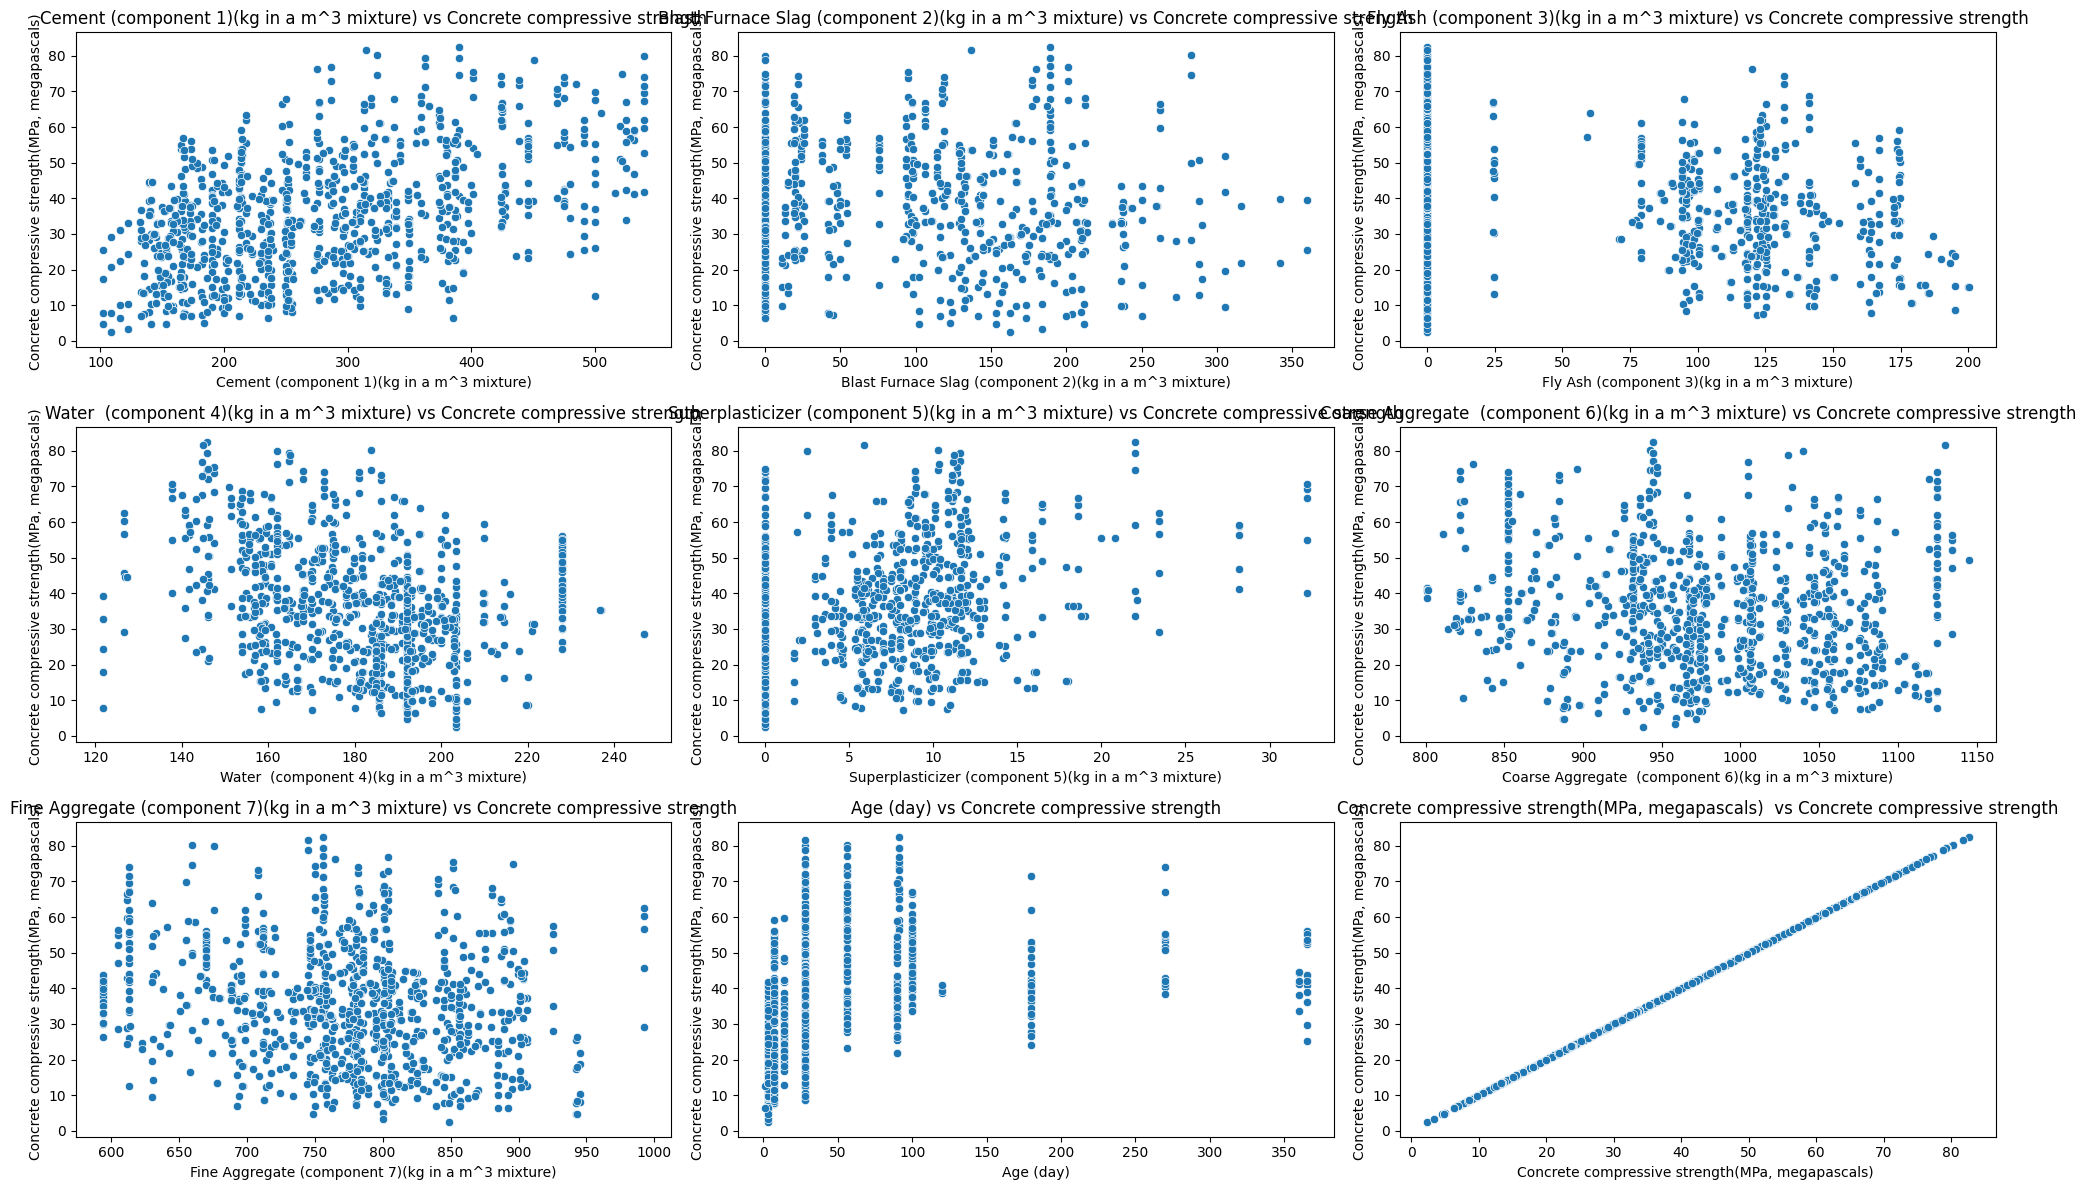

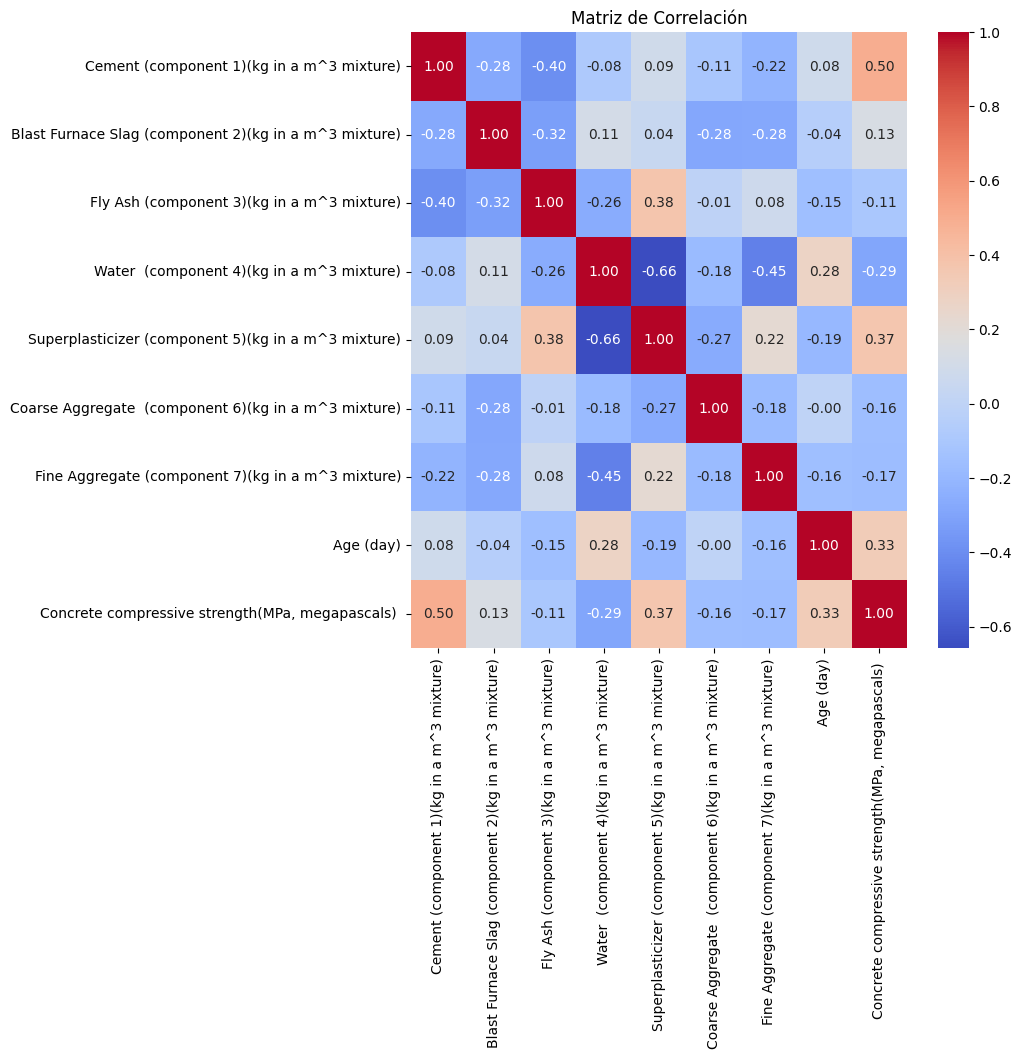

In [ ]:
# gráfico de relación
t = 'Concrete compressive strength'

fts = [col for col in df.columns if col != t]

plt.figure(figsize=(20, 12))
for i, feature in enumerate(fts):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(data=df, x=feature, y=df.columns[8])
    plt.title(f'{feature} vs {t}')
plt.tight_layout()
plt.show()


# mapa de calor de correlación (Se calcula con correlacion de pearson)
plt.figure(figsize=(8, 8))
cor_m = df.corr()
sns.heatmap(cor_m, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# **Task 2: Choose a Model (8 points)**
* Select at least two models and implement them: it could be one linear (e.g., Multiple Linear Regression) and one non-linear (e.g., Polynomial Regression).
* Justify your choice.

### **Probaremos 3 modelos y elegiremos el mejor**
Solucion:
Se elegirá las variables que presentan mayor correlación con la variable objetivo. Es por ello que se empleará un modelo de regresioón lineal multiple de 3 variables: Cement, Superplasticizer y Age(days).  Por otra parte se probará hacerlo en grupo, como tambien individualmente, para observar como evoluciona la precisión del modelo

In [ ]:
## Importamos librarias para ML
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df.columns = df.columns.str.strip()
print(df.columns.tolist())



['Cement (component 1)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 'Fly Ash (component 3)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)', 'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)', 'Concrete compressive strength(MPa, megapascals)']


In [ ]:
#y = df['Concrete compressive strength(MPa, megapascals)']
df.rename(columns={'Concrete compressive strength(MPa, megapascals)': 'Strength',
                   'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplasticizer',
    'Age (day)': 'Age',
                       'Cement (component 1)(kg in a m^3 mixture)': 'Cement',

}, inplace=True)
y= df['Strength']

# Imprimer los nombres d columnas en toda una fila
#  print(df.columns.tolist())
## Although, I want to the see the names one by row, into a single column

for name in df.columns:
    print(name)



Cement
Blast Furnace Slag (component 2)(kg in a m^3 mixture)
Fly Ash (component 3)(kg in a m^3 mixture)
Water  (component 4)(kg in a m^3 mixture)
Superplasticizer
Coarse Aggregate  (component 6)(kg in a m^3 mixture)
Fine Aggregate (component 7)(kg in a m^3 mixture)
Age
Strength


In [ ]:
# Definir los modelos y variables
models = {
    "Modelo 1: Cement + Superplasticizer + Age": ['Cement', 'Superplasticizer', 'Age'],
    "Modelo 2: Solo Cement": ['Cement'],
    "Modelo 3: Cement + Superplasticizer": ['Cement', 'Superplasticizer']
}

# Lista para guardar resultados
results = []

# Entrenar y evaluar cada modelo
for name, features in models.items():
    X = df[features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append([name, r2, rmse])

# Crear DataFrame de resultados
results_df = pd.DataFrame(results, columns=["Modelo", "R²", "RMSE"])

# Mostrar tabla comparativa
print("Resultados comparativos de los modelos:")
display(results_df)


Resultados comparativos de los modelos:


,Modelo,R²,RMSE
0,Modelo 1: Cement + Superplasticizer + Age,0.533248,10.966909
1,Modelo 2: Solo Cement,0.251831,13.884844
2,Modelo 3: Cement + Superplasticizer,0.371407,12.726997


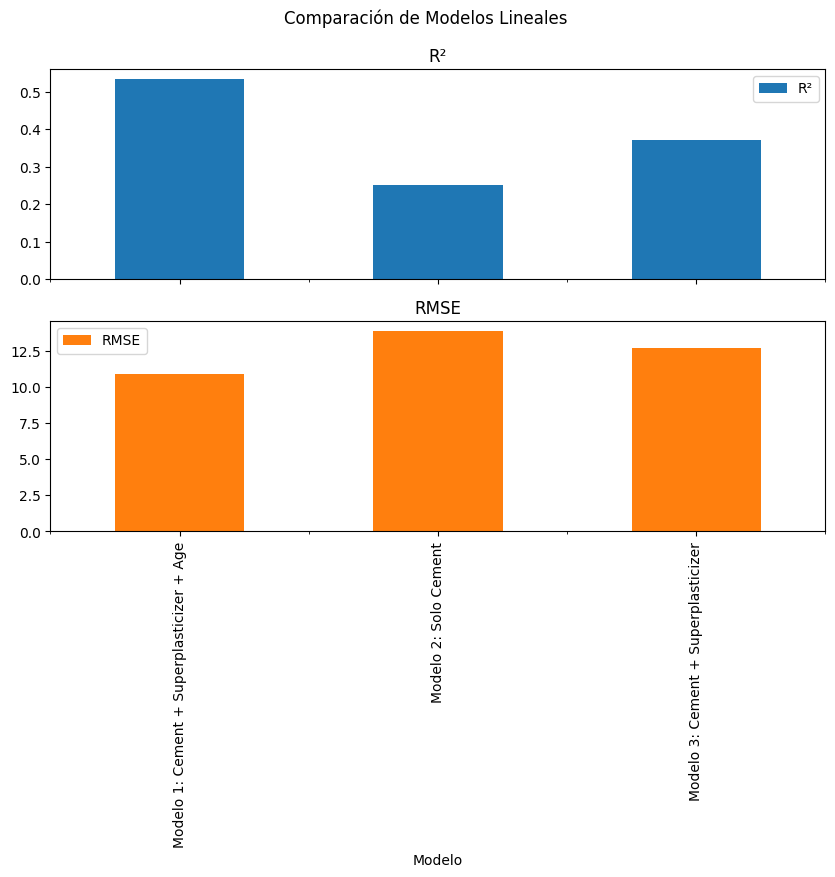

In [ ]:
# grafic ode barras para visualizar la calidad de cada modelo lineal
results_df.set_index("Modelo")[["R²", "RMSE"]].plot(kind="bar", figsize=(10,6), subplots=True)
plt.suptitle("Comparación de Modelos Lineales")
plt.show()


In [ ]:
# "=== Modelo 1: Cement + Superplasticizer + Age ===")


X1 = df[['Cement', 'Superplasticizer', 'Age']]
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(X1_train, y_train)
y1_pred = model1.predict(X1_test)






In [ ]:
print("=== Modelo 1: Cement + Superplasticizer + Age ===")
print("Coeficientes:", model1.coef_)
print("Intercept:", model1.intercept_)
print("R^2:", r2_score(y_test, y1_pred))
mse = mean_squared_error(y_test, y1_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
print("\n")


=== Modelo 1: Cement + Superplasticizer + Age ===
Coeficientes: [0.06772012 1.08693769 0.10019308]
Intercept: 5.49590926922863
R^2: 0.5332482786072049
RMSE: 10.966908928141626




In [ ]:
# =======================================
# Modelo 2: Solo Cement
# =======================================
X2 = df[['Cement']]
X2_train, X2_test, _, _ = train_test_split(X2, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y_train)
y2_pred = model2.predict(X2_test)


In [ ]:

print("=== Modelo 2: Solo Cement ===")
print("Coeficiente:", model2.coef_)
print("Intercept:", model2.intercept_)
print("R^2:", r2_score(y_test, y2_pred))
MSE= mean_squared_error(y_test,y2_pred)
RMSE = np.sqrt(MSE)
print("RMSE : ",RMSE)

=== Modelo 2: Solo Cement ===
Coeficiente: [0.07789519]
Intercept: 13.785457525758371
R^2: 0.25183140674244187
RMSE :  13.884844154264744


Solucion:
Se elegirá las variables que presentan mayor correlación con la variable objetivo. Es por ello que se empleará un modelo de regresioón lineal multiple de 3 variables: Cement, Superplasticizer y Age(days).  Por otra parte se probará hacerlo en grupo, como tambien individualmente, para observar como evoluciona la precisión del modelo

In [ ]:
# CODE
# =======================================
# Modelo 3: Cement + Superplasticizer
# =======================================
X3 = df[['Cement', 'Superplasticizer']]
X3_train, X3_test, _, _ = train_test_split(X3, y, test_size=0.2, random_state=42)

model3 = LinearRegression()
model3.fit(X3_train, y_train)
y3_pred = model3.predict(X3_test)

print("=== Modelo 3: Cement + Superplasticizer ===")
print("Coeficientes:", model3.coef_)
print("Intercept:", model3.intercept_)
print("R^2:", r2_score(y_test, y3_pred))
print("MSE:", mean_squared_error(y_test, y3_pred))
rmse = np.sqrt(mean_squared_error(y_test, y3_pred))
print("RMSE:", rmse)

=== Modelo 3: Cement + Superplasticizer ===
Coeficientes: [0.07404499 0.89500631]
Intercept: 9.361195940416529
R^2: 0.37140731207146016
MSE: 161.97644779323647
RMSE: 12.726996809665525


### Ahora buscaremos un modelo no lineal para el problema

Para ello implementaremos un modelo Random Forest con las mismas 3 variables empleadas para el modelo lineal. Luego, evaluaremos un modelo con las 5 variables con mayor correlacion inversa o directa. Compararemos la calidad de las predicciones y determinaremos resultados

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = df[['Cement', 'Superplasticizer', 'Age']]  # mismo set del modelo lineal
y = df['Strength']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo no lineal (Random Forest)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predecir y evaluar
y_pred = rf_model.predict(X_test)
r2_score_rf = r2_score(y_test, y_pred)

mse_rf = mean_squared_error(y_test, y_pred)
RMSE_random_forest = np.sqrt(mse_rf)
print("R^2:", r2_score_rf)
print("RMSE:", RMSE_random_forest)


R^2: 0.7963586605459478
RMSE: 7.243930005970538


Nuevas características polinomiales: ['Cement' 'Superplasticizer' 'Age' 'Cement^2' 'Cement Superplasticizer'
 'Cement Age' 'Superplasticizer^2' 'Superplasticizer Age' 'Age^2']
R²: 0.687630167197234
RMSE: 80.49179840429701


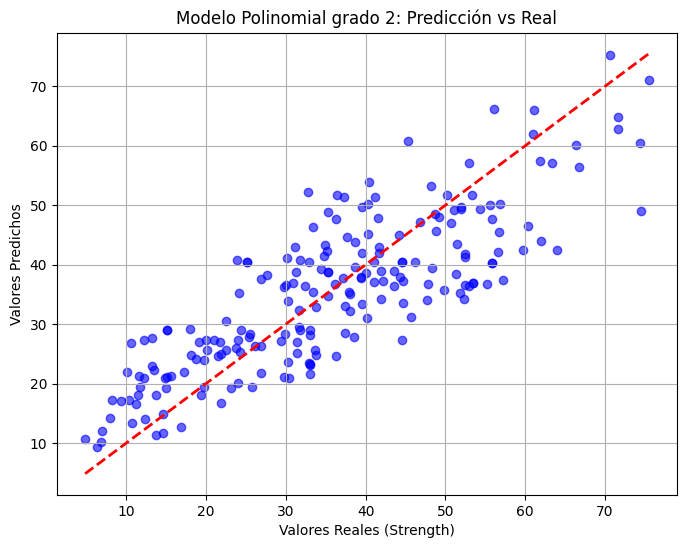

In [ ]:
# ahora probaremos con un modelo polinomial con las 3 variables que tenemos
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X = df[['Cement', 'Superplasticizer', 'Age']]  # variables independientes
y = df['Strength']

# =========================
# División train/test
# =========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =========================
# Transformación polinomial
# =========================
degree = 2  # Hiperparámetro: grado del polinomio
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print("Nuevas características polinomiales:", poly.get_feature_names_out(X.columns))

# =========================
# Entrenar modelo lineal sobre las nuevas características
# =========================
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predicción y evaluación
y_pred = model.predict(X_test_poly)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Valores Reales (Strength)")
plt.ylabel("Valores Predichos")
plt.title(f"Modelo Polinomial grado {degree}: Predicción vs Real")
plt.grid(True)
plt.show()


,Grado,R²,RMSE
0,1,0.533248,120.273091
1,2,0.687630,80.491798
2,3,0.710659,74.557613
3,4,0.725709,70.679610


# **Task 3: Optimize Hyperparameters (2 points)**
* Tune at least one hyperparameter for your linear or non-linear model.
* Compare results with default settings.

In [ ]:
X = df[['Cement', 'Superplasticizer', 'Age']]
y = df['Strength']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista de grados a probar
degrees = [1, 2, 3, 4]

results = []

for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)

    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)

    results.append([d, r2, rmse])

# Tabla de comparación
results_df = pd.DataFrame(results, columns=["Grado", "R²", "RMSE"])
display(results_df)


,Grado,R²,RMSE
0,1,0.533248,120.273091
1,2,0.687630,80.491798
2,3,0.710659,74.557613
3,4,0.725709,70.679610


# **Task 4: Analysis & Discussion (6 points)**
* Evaluate models using RMSE and R² scores.
* Interpret differences in performance.
* Plot residuals and compare how models capture the data structure.

In [ ]:
# CODE